<a href="https://colab.research.google.com/github/SowjanyaKiran/web_scraping_BeautifulSoup_IMDb_Rating/blob/main/web_scraping_BeautifulSoup_IMDb_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing necesarry libraries
!pip install beautifulsoup4

In [ ]:
!pip install requests

In [ ]:
import requests
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

# Step 1: Get the webpage
url = "https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows"
response = requests.get(url)

# Step 2: Parse the HTML
soup = BeautifulSoup(response.text, "html.parser")

# Step 3: Extract data
title = soup.title.text
paragraphs = [p.text for p in soup.find_all("p")]

print("Page Title:", title)
print("Paragraphs:", paragraphs)

Page Title: IMDB Movies Dataset | Kaggle
Paragraphs: []


In [ ]:
# Downloading imdb top 250 movie's data
url = "https://www.imdb.com/chart/top/"
headers = {"User-Agent": "Mozilla/5.0"}  # Pretend like a browser
response = requests.get(url, headers=headers)
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
movies = soup.select('td.titleColumn')
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value')
        for b in soup.select('td.posterColumn span[name=ir]')]

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

# Step 1: Fetch IMDb Top 250 page
url = "https://www.imdb.com/chart/top/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Step 2: Find movie containers
movies = soup.select("td.titleColumn")
ratings = soup.select("td.imdbRating strong")

movie_list = []

# Step 3: Loop through movies and extract details
for index in range(len(movies)):
    movie_string = movies[index].get_text(strip=True)
    movie_link = movies[index].a  # anchor tag
    title = movie_link.text if movie_link else "Unknown"

    # Extract year
    year_match = re.search(r"\((\d{4})\)", movie_string)
    year = year_match.group(1) if year_match else "Unknown"

    # Extract place/rank
    place = movie_string.split('.')[0]

    # Extract star cast from the "title" attribute of the <a> tag
    crew = movie_link.get("title") if movie_link else "Unknown"

    # Extract rating
    rating = ratings[index].get_text() if index < len(ratings) else "N/A"

    # Build dictionary
    data = {
        "place": place,
        "movie_title": title,
        "rating": rating,
        "year": year,
        "star_cast": crew
    }
    movie_list.append(data)

# Step 4: Print results
for m in movie_list[:10]:  # show first 10 movies
    print(m)

In [ ]:
for movie in list:
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'] +
          ') -', 'Starring:', movie['star_cast'], movie['rating'])

In [ ]:
#saving the list as dataframe
#then converting into .csv file
df = pd.DataFrame(list)
df.to_csv('imdb_top_250_movies.csv',index=False)

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

url = "https://www.imdb.com/chart/top/"
headers = {"User-Agent": "Mozilla/5.0"}  # Pretend like a browser
response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.text, "html.parser")

movies = []

# Each movie is inside a <li> under .ipc-metadata-list
for item in soup.select("li.ipc-metadata-list-summary-item"):
    title_el = item.select_one("h3")
    title = title_el.get_text(strip=True) if title_el else None

    year_el = item.select_one("span.ipc-title__subtext")
    year = year_el.get_text(strip=True) if year_el else None

    rating_el = item.select_one("span.ipc-rating-star--rating")
    rating = rating_el.get_text(strip=True) if rating_el else None

    crew_el = item.select_one("div.sc-b189961a-7")
    crew = crew_el.get_text(" ", strip=True) if crew_el else None

    movies.append({
        "title": title,
        "year": year,
        "rating": rating,
        "crew": crew
    })

# Save to CSV
df = pd.DataFrame(movies)
df.to_csv("imdb_top_250_movies.csv", index=False, encoding="utf-8")

print(f"✅ Scraped {len(df)} movies")

✅ Scraped 25 movies


In [ ]:
# code for selecting all 250 movies data
import json
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Fetch the page with a proper User-Agent
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}
url = "https://www.imdb.com/chart/top/"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Step 2: Find the JSON-LD block with all movies
script = soup.select_one("script[type='application/ld+json']")
data = json.loads(script.string)

# Step 3: Extract each movie's details
movies = []
for item in data["itemListElement"]:
    movie = item["item"]
    movies.append({
        "Movie title": movie.get("name"),
        "Url": movie.get("url"),
        "Position": item.get("position"),
        "Duration": movie.get("duration"),
        "Genre": movie.get("genre"),
        "Rating": movie.get("aggregateRating", {}).get("ratingValue"),
        "RatingCount": movie.get("aggregateRating", {}).get("ratingCount")
    })

# Step 4: Save to CSV
df = pd.DataFrame(movies)
df.to_csv("imdb_top_250_movies_alltime.csv", index=False, encoding="utf-8")

print(f"Successfully scraped {len(df)} movies.")


Successfully scraped 250 movies.


In [ ]:
df

,Movie title,Url,Position,Duration,Genre,Rating,RatingCount
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,None,PT2H22M,Drama,9.3,3089904
1,The Godfather,https://www.imdb.com/title/tt0068646/,None,PT2H55M,"Crime, Drama",9.2,2154316
2,The Dark Knight,https://www.imdb.com/title/tt0468569/,None,PT2H32M,"Action, Crime, Drama",9.1,3065260
3,The Godfather Part II,https://www.imdb.com/title/tt0071562/,None,PT3H22M,"Crime, Drama",9.0,1448447
4,12 Angry Men,https://www.imdb.com/title/tt0050083/,None,PT1H36M,"Crime, Drama",9.0,945242
...,...,...,...,...,...,...,...
245,The Help,https://www.imdb.com/title/tt1454029/,None,PT2H26M,Drama,8.1,518102
246,Gekijô-ban Kimetsu no Yaiba Mugen Ressha-hen,https://www.imdb.com/title/tt11032374/,None,PT1H57M,"Animation, Action, Adventure",8.2,88928
247,Groundhog Day,https://www.imdb.com/title/tt0107048/,None,PT1H41M,"Comedy, Drama, Fantasy",8.0,724266
248,Drishyam,https://www.imdb.com/title/tt4430212/,None,PT2H43M,"Crime, Drama, Mystery",8.2,103654


In [ ]:
df.columns

Index(['Movie title', 'Url', 'Position', 'Duration', 'Genre', 'Rating',
       'RatingCount'],
      dtype='object')

In [ ]:
df.head()

,Movie title,Url,Position,Duration,Genre,Rating,RatingCount
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,None,PT2H22M,Drama,9.3,3089904
1,The Godfather,https://www.imdb.com/title/tt0068646/,None,PT2H55M,"Crime, Drama",9.2,2154316
2,The Dark Knight,https://www.imdb.com/title/tt0468569/,None,PT2H32M,"Action, Crime, Drama",9.1,3065260
3,The Godfather Part II,https://www.imdb.com/title/tt0071562/,None,PT3H22M,"Crime, Drama",9.0,1448447
4,12 Angry Men,https://www.imdb.com/title/tt0050083/,None,PT1H36M,"Crime, Drama",9.0,945242


In [ ]:
df.tail()

,Movie title,Url,Position,Duration,Genre,Rating,RatingCount
245,The Help,https://www.imdb.com/title/tt1454029/,None,PT2H26M,Drama,8.1,518102
246,Gekijô-ban Kimetsu no Yaiba Mugen Ressha-hen,https://www.imdb.com/title/tt11032374/,None,PT1H57M,"Animation, Action, Adventure",8.2,88928
247,Groundhog Day,https://www.imdb.com/title/tt0107048/,None,PT1H41M,"Comedy, Drama, Fantasy",8.0,724266
248,Drishyam,https://www.imdb.com/title/tt4430212/,None,PT2H43M,"Crime, Drama, Mystery",8.2,103654
249,Gangs of Wasseypur,https://www.imdb.com/title/tt1954470/,None,PT5H21M,"Action, Comedy, Crime",8.2,109792


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie title  250 non-null    object 
 1   Url          250 non-null    object 
 2   Position     0 non-null      object 
 3   Duration     250 non-null    object 
 4   Genre        250 non-null    object 
 5   Rating       250 non-null    float64
 6   RatingCount  250 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 13.8+ KB


In [ ]:
#checking whether is there any null values
df.isnull().sum()

,0
Movie title,0
Url,0
Position,250
Duration,0
Genre,0
Rating,0
RatingCount,0


In [ ]:
# Getting an idea whether there are any missing values in the data or not
df.isnull().sum().any()

np.True_

In [ ]:
#Getting an idea about the shape of the data
print('Shape :', df.shape)
print('Rows :', df.shape[0])
print('Columns :', df.shape[1])

Shape : (250, 7)
Rows : 250
Columns : 7


In [ ]:
#Checking the duplicate in the data
df.duplicated().sum()

np.int64(0)

In [ ]:
# Fixing the duration column
def convert_duration(duration):
    if pd.isnull(duration):
        return None
    duration = str(duration)  # Convert to string to avoid TypeError
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
    if 'm' in duration:
        minutes = int(duration.split('m')[0].split('h')[-1])
    return hours * 60 + minutes

In [ ]:
# Driver Code
df['duration'] = df['Duration'].apply(convert_duration)
df.head()

,Movie title,Url,Position,Duration,Genre,Rating,RatingCount,duration
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,None,PT2H22M,Drama,9.3,3089904,0
1,The Godfather,https://www.imdb.com/title/tt0068646/,None,PT2H55M,"Crime, Drama",9.2,2154316,0
2,The Dark Knight,https://www.imdb.com/title/tt0468569/,None,PT2H32M,"Action, Crime, Drama",9.1,3065260,0
3,The Godfather Part II,https://www.imdb.com/title/tt0071562/,None,PT3H22M,"Crime, Drama",9.0,1448447,0
4,12 Angry Men,https://www.imdb.com/title/tt0050083/,None,PT1H36M,"Crime, Drama",9.0,945242,0


In [ ]:
df.head()['Genre']

,Genre
0,Drama
1,"Crime, Drama"
2,"Action, Crime, Drama"
3,"Crime, Drama"
4,"Crime, Drama"


In [ ]:
# Split "genre" into multi-hot encoding
genre_dummies = df['Genre'].str.get_dummies(sep = ',')
df = pd.concat([df, genre_dummies], axis = 1)

In [ ]:
# Dropping irrelevant columns
df_cleaned = df.drop(['Url', 'Position' ,'Duration', 'Genre'], axis = 1)
df_cleaned.head()

,Movie title,Rating,RatingCount,duration,Action,Adventure,Biography,Comedy,Crime,Drama,...,Western,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Horror,Mystery
0,The Shawshank Redemption,9.3,3089904,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,The Godfather,9.2,2154316,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,The Dark Knight,9.1,3065260,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,The Godfather Part II,9.0,1448447,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,12 Angry Men,9.0,945242,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Checking for null values
df_cleaned.isnull().sum().any()

np.False_

In [ ]:
#Checking for null values
df_cleaned.isnull().sum()

,0
Movie title,0
Rating,0
RatingCount,0
duration,0
Action,0
Adventure,0
Biography,0
Comedy,0
Crime,0
Drama,0


In [ ]:
#checking null values in rows and dropping it
df_cleaned = df_cleaned.dropna()
df_cleaned.isnull().sum().any()

np.False_

In [ ]:
#correlation analysis
correlation_metrix = df_cleaned.corr(numeric_only = True)
correlation_metrix['Rating'].sort_values(ascending = False)

,Rating
Rating,1.000000
RatingCount,0.589734
Crime,0.162202
Fantasy,0.110155
Drama,0.101310
Western,0.062015
Sci-Fi,0.059327
Horror,0.056496
Music,0.050428
Action,0.035241


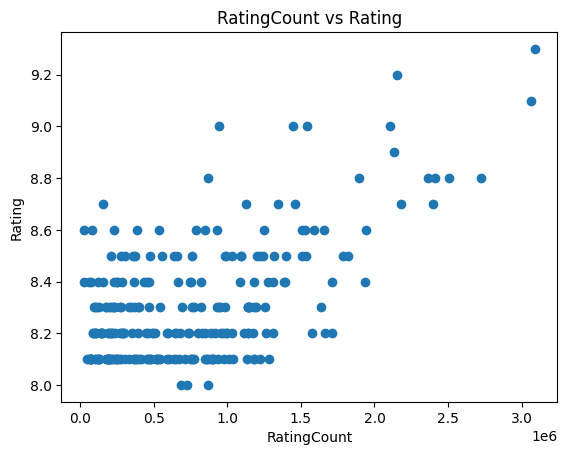

In [ ]:
#scatter plot : RatingCount vs ratings
import matplotlib.pyplot as plt
plt.scatter(df_cleaned['RatingCount'], df_cleaned['Rating'])
plt.xlabel('RatingCount')
plt.ylabel('Rating')
plt.title('RatingCount vs Rating')
plt.show()

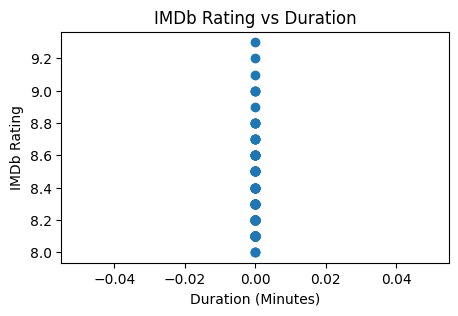

In [ ]:
#Scatter plot : ratings and duration
plt.figure(figsize = (5, 3))
plt.scatter(df_cleaned['duration'], df_cleaned['Rating'])
plt.xlabel('Duration (Minutes)')
plt.ylabel('IMDb Rating')
plt.title('IMDb Rating vs Duration')
plt.show()

/tmp/ipython-input-2762359458.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Rating'], bins = 10, kde = True)


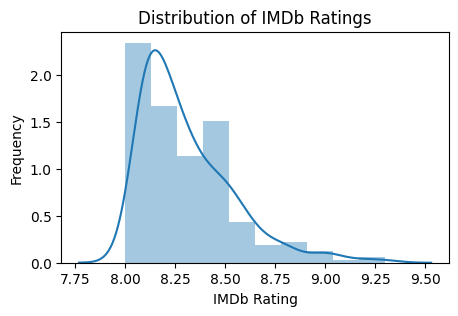

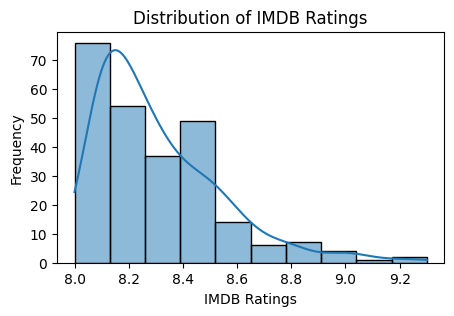

In [ ]:
#Distribuation plot for imbd_ratings
plt.figure(figsize = (5, 3))
sns.distplot(df_cleaned['Rating'], bins = 10, kde = True)
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Ratings')
plt.show()

plt.figure(figsize = (5, 3))
sns.histplot(df_cleaned['Rating'], bins = 10, kde = True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Ratings')
plt.ylabel('Frequency')
plt.show()

In [ ]:
duplicates = df_cleaned.columns[df_cleaned.columns.duplicated()]
print("Duplicate Columns:", duplicates)

Duplicate Columns: Index([], dtype='object')


In [ ]:
# Average IMDB Rating by Genre (Top 10 by frequency)
genre_columns = genre_dummies.columns
genre_counts = df_cleaned[genre_columns].sum().sort_values(ascending = False).head(10)
avg_ratings = {genre : df_cleaned[df_cleaned[genre] == 1]['Rating'].mean() for genre in genre_counts.index}
print(avg_ratings)

{' Drama': np.float64(8.333620689655172), 'Drama': np.float64(8.302857142857144), 'Action': np.float64(8.326829268292684), ' Adventure': np.float64(8.304999999999998), 'Crime': np.float64(8.4), ' Mystery': np.float64(8.293548387096774), ' Thriller': np.float64(8.251851851851852), 'Animation': np.float64(8.257692307692306), 'Comedy': np.float64(8.253846153846153), ' War': np.float64(8.272)}


/tmp/ipython-input-3087337950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = avg_ratings.keys(), x = avg_ratings.values(), palette = 'viridis')


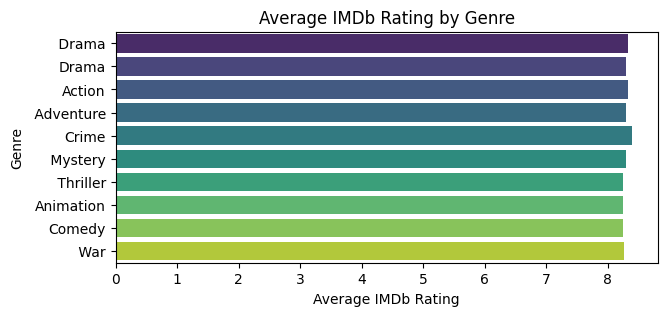

In [ ]:
#plot : Average IMDB Rating by Genre
plt.figure(figsize = (7,3))
sns.barplot(y = avg_ratings.keys(), x = avg_ratings.values(), palette = 'viridis')
plt.ylabel('Genre')
plt.xlabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Genre')
plt.show()

In [ ]:
# Creating the function
def category_year(year):
  if 1990 <= year <= 2000:
    return '1990s'
  elif 2000 <= year <= 2010:
    return '2000s'
  elif 2010 <= year <= 2020:
    return '2010s'
  elif 2020 <= year <= 2025:
    return '2020s'
  else:
    return 'Other'

In [ ]:
# Creating a column with name 'year_range'
df_cleaned['year'] = df_cleaned['Movie title'].str.extract(r'\((\d{4})\)').astype(float)
df_cleaned['year_range'] = df_cleaned['year'].apply(category_year)
df_cleaned.head()

,Movie title,Rating,RatingCount,duration,Action,Adventure,Biography,Comedy,Crime,Drama,...,Adventure,Animation,Biography,Comedy,Crime,Drama,Horror,Mystery,year,year_range
0,The Shawshank Redemption,9.3,3089904,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,Other
1,The Godfather,9.2,2154316,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,NaN,Other
2,The Dark Knight,9.1,3065260,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,NaN,Other
3,The Godfather Part II,9.0,1448447,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,NaN,Other
4,12 Angry Men,9.0,945242,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,NaN,Other


In [ ]:
# One Hot Encode the "year_range"
year_range_dummies = pd.get_dummies(df_cleaned['year_range'], prefix = 'year')
year_range_dummies = year_range_dummies.replace({False : 0 , True : 1})
df_cleaned = pd.concat([df_cleaned, year_range_dummies], axis = 1)
df_cleaned.head()

/tmp/ipython-input-1621672124.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  year_range_dummies = year_range_dummies.replace({False : 0 , True : 1})


,Movie title,Rating,RatingCount,duration,Action,Adventure,Biography,Comedy,Crime,Drama,...,Animation,Biography,Comedy,Crime,Drama,Horror,Mystery,year,year_range,year_Other
0,The Shawshank Redemption,9.3,3089904,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,Other,1
1,The Godfather,9.2,2154316,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,NaN,Other,1
2,The Dark Knight,9.1,3065260,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,NaN,Other,1
3,The Godfather Part II,9.0,1448447,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,NaN,Other,1
4,12 Angry Men,9.0,945242,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,NaN,Other,1


In [ ]:
#Dropping irrelevant features from the data
df_cleaned = df_cleaned.drop(['year', 'year_range'], axis = 1)
df_cleaned.head()

,Movie title,Rating,RatingCount,duration,Action,Adventure,Biography,Comedy,Crime,Drama,...,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Horror,Mystery,year_Other
0,The Shawshank Redemption,9.3,3089904,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,The Godfather,9.2,2154316,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,The Dark Knight,9.1,3065260,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
3,The Godfather Part II,9.0,1448447,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,12 Angry Men,9.0,945242,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
#importing important libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#splitting and scaling
X = df_cleaned.drop(['Rating'], axis = 1)
y = df_cleaned['Rating']

In [ ]:
#performing the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#normalize numeric features
scaler = StandardScaler()
numeric_cols = ['duration', 'RatingCount']

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
#model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

In [ ]:
#Dropping non numeric columns
X_train = X_train.select_dtypes(include = ['number']).drop('Movie title', axis=1, errors='ignore')
X_test = X_test.select_dtypes(include = ['number']).drop('Movie title', axis=1, errors='ignore')

In [ ]:
#Initialize the model
lr_model = LinearRegression()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

In [ ]:
# Training the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
# Taking predictions from the model on testing data
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

In [ ]:
# Importing important libraries
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Compute Metrics
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)
  return {
      'Model' : model_name,
      'MSE' : mse,
      'RMSE' : rmse,
      'R2 Score' : r2
  }

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Define evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        "Model": model_name,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Evaluate models
results = [
    evaluate_model(y_test, lr_pred, "Linear Regression"),
    evaluate_model(y_test, rf_pred, "Random Forest"),
    evaluate_model(y_test, gb_pred, "Gradient Boosting")
]

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df.head())


               Model       MSE      RMSE  R2 Score
0  Linear Regression  0.049910  0.223406  0.169549
1      Random Forest  0.051054  0.225951  0.150518
2  Gradient Boosting  0.050012  0.223633  0.167859


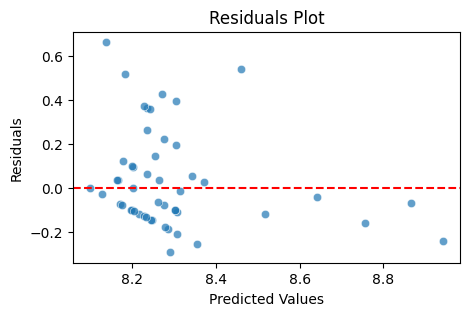

In [ ]:
# Residuals plot for best model (e.g, Gradient Boosting Regressor)
residuals = y_test - gb_pred
plt.figure(figsize = (5, 3))
sns.scatterplot(x = gb_pred, y = residuals, alpha = 0.7)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Importing important libraries'
from sklearn.model_selection import GridSearchCV

# Parameters Grid
param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1]
}

# Initializing Grid Search
grid_search = GridSearchCV(estimator = GradientBoostingRegressor(),
                           param_grid = param_grid, cv = 5,
                           scoring = 'r2', n_jobs = -1)

# Fitting the data
grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}


In [ ]:
#Creating the optimal model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print('Best Parameters :', grid_search.best_params_)
print('R2 Score :', np.round(r2_score(y_test, y_pred_best), 3))

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}


In [ ]:
#create a parameter dictionary with more combinations of hyper-parameters
# Define your model
model = RandomForestRegressor(random_state=42)

# Expanded parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='r2'
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print('Best Parameters:', grid_search.best_params_)
print('R2 Score:', np.round(r2_score(y_test, y_pred_best), 3))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
R2 Score: 0.161


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

In [ ]:
# Model Interpretation
# Extract the feature importances
feature_importances = pd.Series(best_model.feature_importances_, index = X_train.columns)
top_features = feature_importances.sort_values(ascending = False).head(10)
print(top_features)

RatingCount    0.648333
 Fantasy       0.035382
Crime          0.034613
 Drama         0.026820
 Sport         0.020898
Biography      0.020690
 Sci-Fi        0.018671
 Thriller      0.018426
 Comedy        0.016587
Adventure      0.016579
dtype: float64


/tmp/ipython-input-1042644476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_features.values, y = top_features.index, palette = 'viridis')


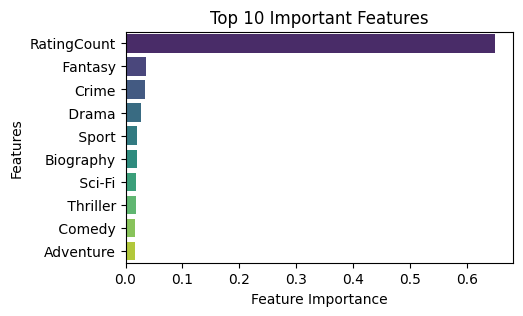

In [ ]:
# Plot the top 10 important features
plt.figure(figsize = (5, 3))
sns.barplot(x = top_features.values, y = top_features.index, palette = 'viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
#importing the necesarry libraries
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
# STEP 1: Identify categorical feature column names or indices
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
# STEP 2: Define CatBoost model (don't use verbose logging inside GridSearchCV to avoid spam)
model = CatBoostRegressor(
    silent=True,  # suppress output
    random_state=42
)

In [ ]:
# STEP 3: Expanded hyperparameter grid
param_grid = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 300, 500],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

In [ ]:
# STEP 4: Use Pool to explicitly specify categorical features
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, cat_features=categorical_features)

In [ ]:
# STEP 5: Wrap in GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

In [ ]:
# STEP 6: Fit the model (GridSearch will internally use CatBoost's handling of categoricals)
grid_search.fit(X_train, y_train, cat_features=categorical_features)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7cf9e9a60410>,
             n_jobs=-1,
             param_grid={'border_count': [32, 64, 128], 'depth': [4, 6, 8, 10],
                         'iterations': [100, 300, 500],
                         'l2_leaf_reg': [1, 3, 5, 7],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='r2', verbose=2)

In [ ]:
# STEP 7: Predict and evaluate
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print('Best Parameters:', grid_search.best_params_)
print('R2 Score:', np.round(r2_score(y_test, y_pred_best), 3))

Best Parameters: {'border_count': 128, 'depth': 4, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.05}
R2 Score: 0.258
